In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [37]:
df = web.DataReader('SNDL', data_source='yahoo', start='2017-10-01', end='2022-01-06')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,13.220,7.6600,13.0200,8.480,9314400,8.480
2019-08-02,10.480,8.4200,8.4200,10.450,2693900,10.450
2019-08-05,11.820,10.4700,10.6900,11.700,2206700,11.700
2019-08-06,13.210,11.9900,12.0000,13.000,2180800,13.000
2019-08-07,13.220,12.2000,13.0500,12.850,1611200,12.850
...,...,...,...,...,...,...
2021-12-31,0.609,0.5780,0.6010,0.578,98518800,0.578
2022-01-03,0.620,0.5870,0.5900,0.619,104381300,0.619
2022-01-04,0.644,0.5990,0.6200,0.641,76407700,0.641


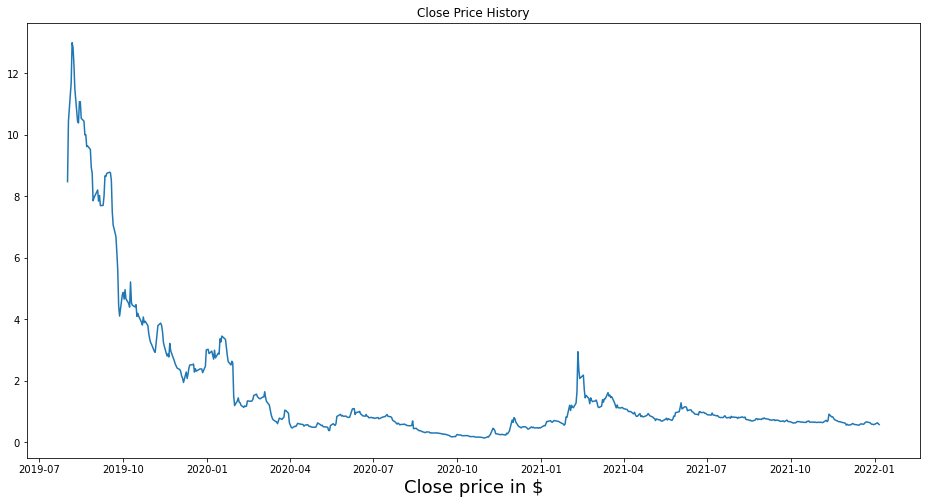

In [38]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.xlabel('Close price in $', fontsize = 18)
plt.show()

In [39]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = int(len(dataset) * .8)
training_data_len

492

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))

615


In [41]:
train_data = scaled_data[0:training_data_len, :]
x_train = [] 
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape

(432, 60)

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(432, 60, 1)

In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

432/432 [==============================] - 11s 19ms/step - loss: 7.1996e-04


In [46]:
test_data = scaled_data[training_data_len - 60 :, :]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
test_data

array([[0.05429372],
       [0.0563939 ],
       [0.05367144],
       [0.05374922],
       [0.05654947],
       [0.0584163 ],
       [0.06191662],
       [0.05864966],
       [0.05600498],
       [0.05320473],
       [0.05024891],
       [0.04947106],
       [0.04425949],
       [0.04838208],
       [0.0457374 ],
       [0.04635968],
       [0.04348164],
       [0.04247044],
       [0.04379278],
       [0.04752645],
       [0.05024891],
       [0.04542626],
       [0.04900436],
       [0.04752645],
       [0.04464841],
       [0.0477598 ],
       [0.05546049],
       [0.05452707],
       [0.06425016],
       [0.0665837 ],
       [0.07669571],
       [0.08914125],
       [0.07358432],
       [0.07902924],
       [0.07902924],
       [0.07747355],
       [0.06891724],
       [0.07047293],
       [0.07125077],
       [0.0665837 ],
       [0.06580585],
       [0.06347231],
       [0.06059427],
       [0.05981643],
       [0.05818295],
       [0.0665837 ],
       [0.0665837 ],
       [0.064

In [47]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [49]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.17504034682018002

<ipython-input-50-3764aad0b631>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


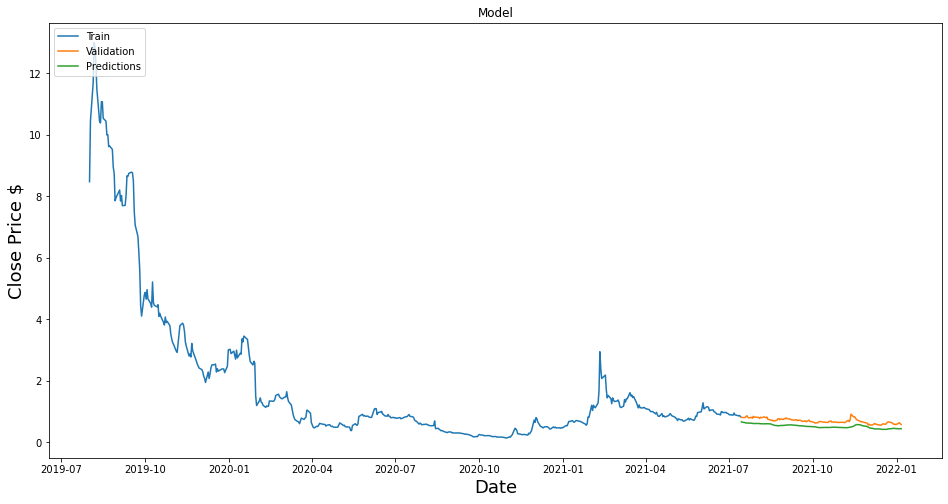

In [50]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = "upper left")
plt.show()